In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Classified Data')

In [3]:
df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0      1000 non-null int64
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [5]:
df.drop(['Unnamed: 0'], inplace = True, axis = 1)

In [6]:
x = df.drop(['TARGET CLASS'], axis = 1)
y = df['TARGET CLASS']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
model = KNeighborsClassifier(n_neighbors = 3)

In [11]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [12]:
prediction = model.predict(X_test)

In [13]:
(prediction != y_test).sum()

13

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [15]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       106
           1       0.94      0.93      0.93        94

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



In [16]:
accuracy_scores = []
K =[]
for item in range(1,41):
    model = KNeighborsClassifier(n_neighbors = item)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    accuracy_scores.append(accuracy)
    K.append(item)

In [17]:
pd.DataFrame({'K' : K, 'Accuracy' : accuracy_scores}).sort_values(by = ['Accuracy'], ascending = False)

,K,Accuracy
30,31,0.955
15,16,0.955
26,27,0.955
28,29,0.955
33,34,0.955
29,30,0.955
20,21,0.950
25,26,0.950
27,28,0.950
31,32,0.950


In [18]:
model = KNeighborsClassifier(n_neighbors = 16)

In [19]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [20]:
pred_16 = model.predict(X_test)

In [21]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       106
           1       0.94      0.96      0.95        94

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [22]:
from sklearn.datasets import load_breast_cancer

In [23]:
df2 = load_breast_cancer()

In [24]:
df2.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
df2['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [26]:
x = pd.DataFrame(df2['data'],columns = df2['feature_names'])

In [27]:
y = pd.DataFrame(df2['target'], columns = ['target'])['target'].map({0 : 'malignant', 1 : 'benign'})

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 101)

In [30]:
model_cancer = KNeighborsClassifier(n_neighbors = 3)

In [31]:
model_cancer.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
 pred_cancer = model_cancer.predict(X_test)

In [33]:
print(classification_report(y_test,pred_cancer))

              precision    recall  f1-score   support

      benign       0.92      0.97      0.95        72
   malignant       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
data_scaled = scaler.fit_transform(x)

In [37]:
x_scaled = pd.DataFrame(data_scaled, columns = x.columns)

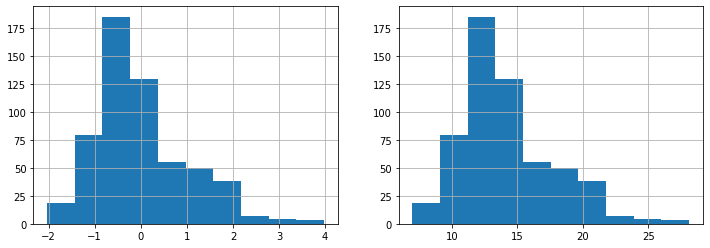

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
x_scaled['mean radius'].hist(ax = ax[0])
x['mean radius'].hist(ax = ax[1])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.2, random_state = 101)

In [42]:
scaled_cancer = KNeighborsClassifier(n_neighbors = 3)

In [43]:
scaled_cancer.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [44]:
pred_scaled_cancer = scaled_cancer.predict(X_test)

In [45]:
print(classification_report(y_test,pred_scaled_cancer))

              precision    recall  f1-score   support

      benign       0.95      0.99      0.97        72
   malignant       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [46]:
accuracy_scores = []
K =[]
for item in range(1,41):
    scaled_cancer = KNeighborsClassifier(n_neighbors = item)
    scaled_cancer.fit(X_train,y_train)
    prediction = scaled_cancer.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    accuracy_scores.append(accuracy)
    K.append(item)

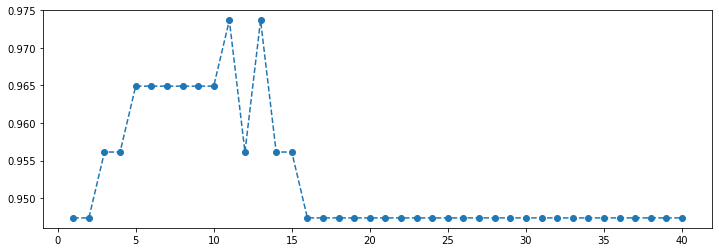

In [49]:
plt.figure(figsize = (12,4))
plt.plot(K,accuracy_scores,linestyle = 'dashed', marker = 'o')

In [50]:
pd.DataFrame({'K' : K, 'Accuracy' : accuracy_scores}).sort_values(by = ['Accuracy'], ascending = False)

,K,Accuracy
10,11,0.973684
12,13,0.973684
9,10,0.964912
4,5,0.964912
5,6,0.964912
6,7,0.964912
7,8,0.964912
8,9,0.964912
14,15,0.956140
11,12,0.956140
